# Simple Genomics
Roberto Toro, Valparaíso 2016

Genome-wide association and genomic complex-trait nalyses using the ADNI dataset.

### Basic concepts

Genomes:
    * Chromosomes,
    * Genes,
    * Introns,
    * Exons

Evolution:
    * Allele frequency,
    * linkage disequilibrium,
    * Population structure

### Public genomic data
We will use public data from the ADNI project (Alzheimer Disease Neuroimaging Initiative). We will obtain demographic, phenotypic and genetic variables from here:

http://adni.loni.usc.edu/

![ADNI](Simple_Genomics/img3.png)

## Plink
Plink is a whole-genome association analysis toolset, probably the most widely used tool in genomics:
http://pngu.mgh.harvard.edu/~purcell/plink/

In [21]:
%%bash
geno="Simple_Genomics/adni100k"
plink="Simple_Genomics/plink-1.07-mac-intel/plink"
$plink --bfile $geno --out "Simple_Genomics/out"


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Web-based version check ( --noweb to skip )
Recent cached web-check found... OK, v1.07 is current

+++ PLINK 1.9 is now available! See above website for details +++ 

Writing this text to log file [ Simple_Genomics/out.log ]
Analysis started: Sun Dec 11 08:23:21 2016

Options in effect:
	--bfile Simple_Genomics/adni100k
	--out Simple_Genomics/out

Reading map (extended format) from [ Simple_Genomics/adni100k.bim ] 
100257 markers to be included from [ Simple_Genomics/adni100k.bim ]
Reading pedigree inform

### Genotyping quality filtering

* Hardy-Weinberg equilibrium (hw): exclude markers that failure the Hardy-Weinberg test at a specified significance threshold (https://en.wikipedia.org/wiki/Hardy%E2%80%93Weinberg_principle)
* Missingness per individual (mind): exclude individuals with too much missing genotype data
* Missingness per marker (geno): exclude SNPs on the basis of missing genotype rate
* Allele frequency (maf): exclude SNPs on the basis of MAF

In [25]:
%%bash
geno="Simple_Genomics/adni100k"
plink="Simple_Genomics/plink-1.07-mac-intel/plink"

# Filter SNPs with standard criteria for quality
%%bash
geno="Simple_Genomics/adni100k"
plink="Simple_Genomics/plink-1.07-mac-intel/plink"
$plink --bfile $geno --out "Simple_Genomics/adni100kFiltered" --maf 0.05 --geno 0.01 --hwe 1e-6 --mind 0.1 --make-bed


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Web-based version check ( --noweb to skip )
Recent cached web-check found... OK, v1.07 is current

+++ PLINK 1.9 is now available! See above website for details +++ 

Writing this text to log file [ Simple_Genomics/adni100kFiltered.log ]
Analysis started: Sun Dec 11 12:21:59 2016

Options in effect:
	--bfile Simple_Genomics/adni100k
	--out Simple_Genomics/adni100kFiltered
	--maf 0.05
	--geno 0.01
	--hwe 1e-6
	--mind 0.1
	--make-bed

Reading map (extended format) from [ Simple_Genomics/adni100k.bim ] 
1002

bash: line 5: fg: no job control


In [26]:
%%bash
geno="Simple_Genomics/adni100kFiltered"
plink="Simple_Genomics/plink-1.07-mac-intel/plink"
$plink --bfile $geno --out "Simple_Genomics/out" --freq


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Web-based version check ( --noweb to skip )
Recent cached web-check found... OK, v1.07 is current

+++ PLINK 1.9 is now available! See above website for details +++ 

Writing this text to log file [ Simple_Genomics/out.log ]
Analysis started: Sun Dec 11 12:22:20 2016

Options in effect:
	--bfile Simple_Genomics/adni100kFiltered
	--out Simple_Genomics/out
	--freq

Reading map (extended format) from [ Simple_Genomics/adni100kFiltered.bim ] 
76551 markers to be included from [ Simple_Genomics/adni100kFiltere

In [184]:
%pylab inline
import sys
import urllib2 as url
import re
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt
from StringIO import StringIO
import json

# Install seaborn typing `conda install seaborn`
import seaborn as sns

# Install Geneview using `pip install geneview`
import geneview as gv

# printf is an old friend from C
def printf(format, *args):
    sys.stdout.write(format % args)

Populating the interactive namespace from numpy and matplotlib


In [29]:
# Minor-allele frequency (MAF)
f1 = open('Simple_Genomics/out.frq', 'r')
for i in range(0,20):
    printf("%s",f1.readline())
f1.close()

 CHR          SNP   A1   A2          MAF  NCHROBS
   1   rs11807848    C    T       0.3922     1512
   1    rs9442373    C    A        0.439     1508
   1   rs12145826    A    G      0.06897     1508
   1    rs3813199    T    C        0.083     1506
   1   rs12410087    C    A        0.109     1504
   1    rs2649588    G    A      0.07672     1512
   1    rs3128342    T    G       0.4848     1510
   1    rs2296716    A    G       0.1197     1512
   1   rs35672141    A    G        0.463     1512
   1    rs7525092    T    C       0.2513     1512
   1    rs2474460    A    G       0.4544     1512
   1    rs2803329    A    G       0.2082     1508
   1    rs2803291    A    G        0.203     1512
   1   rs13303016    C    T       0.1573     1500
   1    rs6605074    T    C        0.207     1512
   1     rs884080    A    G       0.4987     1512
   1    rs7553178    G    A       0.3073     1510
   1    rs2055204    G    A       0.4616     1512
   1    rs4648831    T    C       0.1951     1512


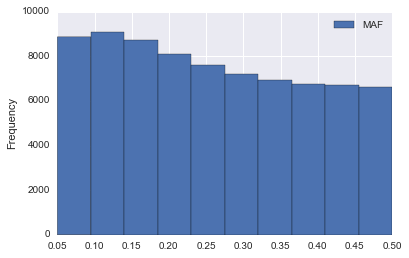

In [30]:
# Histogram of MAF
maf_df=pd.read_csv('Simple_Genomics/out.frq',sep='\s+',header=0)
maf_df.plot(y='MAF',kind='hist')

In [31]:
%%bash
geno="Simple_Genomics/adni100kFiltered"
plink="Simple_Genomics/plink-1.07-mac-intel/plink"

# Number of SNPs per chromosome

for ((i=1;i<23;i++)); do
    echo -n "chr${i} "
    $plink --bfile $geno --chr $i|grep "After frequency and genotyping pruning, there are"|awk '{print $8}'
done

chr1 5816
chr2 6232
chr3 5252
chr4 4597
chr5 4723
chr6 5149
chr7 4185
chr8 4310
chr9 3691
chr10 3928
chr11 3716
chr12 3702
chr13 2858
chr14 2457
chr15 2226
chr16 2330
chr17 1969
chr18 2325
chr19 1244
chr20 1926
chr21 1083
chr22 1098


In [32]:
%%bash
geno="Simple_Genomics/adni100kFiltered"
plink="Simple_Genomics/plink-1.07-mac-intel/plink"

# Linkage disequilibrium
$plink --bfile $geno --out "Simple_Genomics/out" --chr 22 --r2 --matrix


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Web-based version check ( --noweb to skip )
Recent cached web-check found... OK, v1.07 is current

+++ PLINK 1.9 is now available! See above website for details +++ 

Writing this text to log file [ Simple_Genomics/out.log ]
Analysis started: Sun Dec 11 12:23:26 2016

Options in effect:
	--bfile Simple_Genomics/adni100kFiltered
	--out Simple_Genomics/out
	--chr 22
	--r2
	--matrix

Reading map (extended format) from [ Simple_Genomics/adni100kFiltered.bim ] 
76551 markers to be included from [ Simple_Genomi

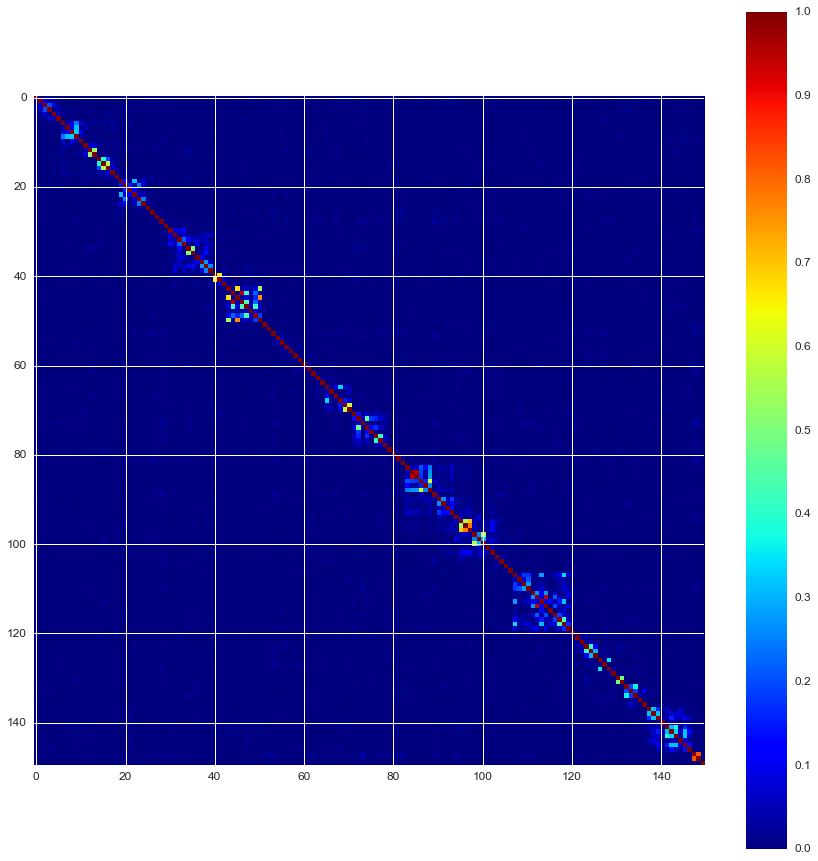

In [198]:
ld_df=pd.read_csv('Simple_Genomics/out.ld',sep='\s+',header=None)
plt.figure(figsize=(15, 15))
plt.imshow(ld_df.iloc[0:150,0:150],interpolation='nearest',cmap=plt.cm.jet)
plt.colorbar()
plt.show()


In [149]:
%%bash
geno="Simple_Genomics/adni100kFiltered"
plink="Simple_Genomics/plink-1.07-mac-intel/plink"

# Identity-by-State
$plink --bfile $geno --out "Simple_Genomics/out" --chr 22 --cluster --matrix


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Web-based version check ( --noweb to skip )
Recent cached web-check found... OK, v1.07 is current

+++ PLINK 1.9 is now available! See above website for details +++ 

Writing this text to log file [ Simple_Genomics/out.log ]
Analysis started: Mon Dec 12 07:54:22 2016

Options in effect:
	--bfile Simple_Genomics/adni100kFiltered
	--out Simple_Genomics/out
	--chr 22
	--cluster
	--matrix

Reading map (extended format) from [ Simple_Genomics/adni100kFiltered.bim ] 
76551 markers to be included from [ Simple_G

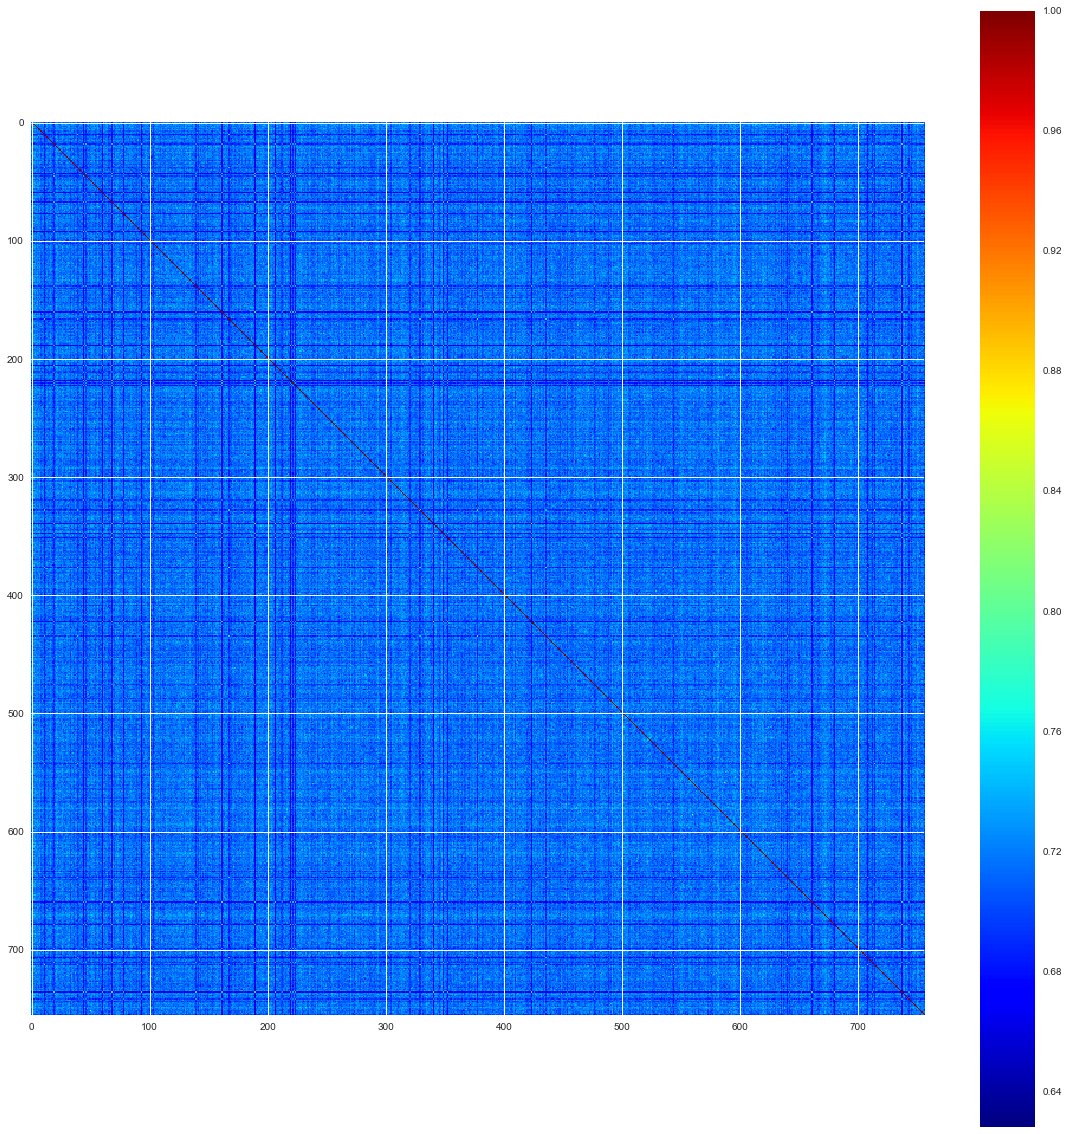

In [150]:
ibs_df=pd.read_csv('Simple_Genomics/out.mibs',sep='\s+',header=None)
plt.figure(figsize=(20, 20))
plt.imshow(ibs_df,interpolation='nearest',cmap=plt.cm.jet)
plt.colorbar()
plt.show()

In [153]:
# We will obtain the Principal Components of variance of this matrix
from matplotlib.mlab import PCA
pca = PCA(ibs_df,standardize=True)

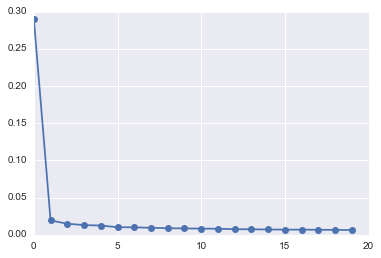

In [172]:
# The matrix has dimensions 756*756, and therefore there are 756 principal components
# We can sort them by the amount of variance they explain
plt.plot(pca.fracs[0:20],'o-')

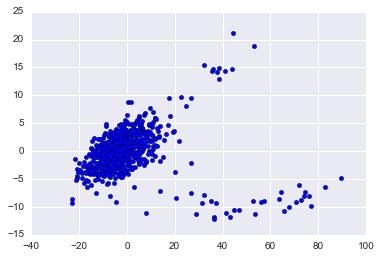

In [165]:
# Now we will plot our 756 in the 2D space defined by the 1st two principal components, PC1 and PC2
x = []
y = []
for item in pca.Y:
    x.append(item[0])
    y.append(item[1])
plt.scatter(x, y) # make a scatter plot of blue dots from the data

## Genes mirror geography within Europe

http://sci-hub.cc/10.1038/nature07331

"we characterize genetic variation in a sample of 3,000 European individuals genotyped at over half a million variable DNA sites in the human genome. Despite low average levels of genetic differentiation among Europeans, we find a close corres- pondence between genetic and geographic distances; indeed, a geographical map of Europe arises naturally as an efficient two- dimensional summary of genetic variation in Europeans. The results emphasize that when mapping the genetic basis of a disease phenotype, spurious associations can arise if genetic structure is not properly accounted for. In addition, the results are relevant to the prospects of genetic ancestry testing6; an individual’s DNA can be used to infer their geographic origin with surprising accuracy— often to within a few hundred kilometres."

![PC1 vs PC2](Simple_Genomics/img1.png)

## Genome-wide association

Genome-wide ssociation is used to identify loci involved with complex traits.

We can test millions of genetic markers for association with a trait in a sample of unrelated subjects.

### Statistical Power

CaTS (http://www.sph.umich.edu/csg/abecasis/cats/), the Power Calculator for Two Stage Association Studies.

Example: For an Additive model, alleles with a frequency=0.5, and Odds-Ratio=1.5,
We nee N~2100 subjects genotyped.

![Statistical Power](Simple_Genomics/img2.png)

### Phenotype file

In [112]:
# Read the .fam file which contains the list of all genotyped subjects
fam_df=pd.read_csv('Simple_Genomics/adni100kFiltered.fam',sep='\s+',header=None)

# Read the pheno.txt file which contains a list of phenotypes per subject (a very small subset of all available)
pheno_df=pd.read_csv('Simple_Genomics/pheno.txt',sep='\s+',header=0)

# Create a new phenotype file containing exclusively the subjects with genotype data
N=len(fam_df)
df = pd.DataFrame()
for i in range(0,N):
    idx=fam_df.iloc[i,1]
    data=pheno_df.loc[pheno_df.iloc[:,0]==idx]
    fid=fam_df.iloc[i,0]
    iid=fam_df.iloc[i,1]
    dx=data.iloc[0,1]
    age=data.iloc[0,2]
    sex=data.iloc[0,3]
    #df=pd.concat([df,data])
    row=pd.DataFrame([[fid,iid,dx,age,sex]],columns=['FID', 'IID', 'DX', 'AGE', 'SEX'])
    df=pd.concat([df,row],ignore_index=True)

# Save that file
# FID IID DX_CN2_AD1_LMCI1 AGE SEX_M1_F2
df.to_csv('Simple_Genomics/pheno2.txt', sep='\t', index=False)

### Association using Plink

In [123]:
%%bash
geno="Simple_Genomics/adni100kFiltered"
plink="Simple_Genomics/plink-1.07-mac-intel/plink"

# Linkage disequilibrium
$plink --bfile $geno --out "Simple_Genomics/out" --pheno "Simple_Genomics/pheno_aff.txt" --mpheno 1 --assoc


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Web-based version check ( --noweb to skip )
Recent cached web-check found... OK, v1.07 is current

+++ PLINK 1.9 is now available! See above website for details +++ 

Writing this text to log file [ Simple_Genomics/out.log ]
Analysis started: Mon Dec 12 07:23:49 2016

Options in effect:
	--bfile Simple_Genomics/adni100kFiltered
	--out Simple_Genomics/out
	--pheno Simple_Genomics/pheno_aff.txt
	--mpheno 1
	--assoc

Reading map (extended format) from [ Simple_Genomics/adni100kFiltered.bim ] 
76551 markers t

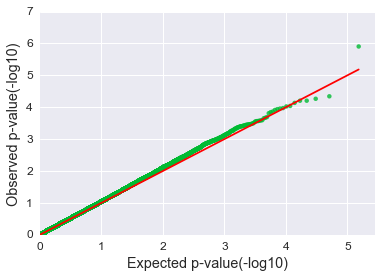

In [185]:
gwas_df=pd.read_csv('Simple_Genomics/out.assoc',sep='\s+',header=0)
gv.gwas.qqplot(gwas_df['P'], color="#00bb33",
               xlabel="Expected p-value(-log10)",
               ylabel="Observed p-value(-log10)")
plt.show()

AttributeError: 'numpy.float64' object has no attribute 'lower'

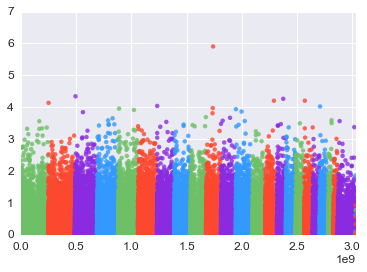

In [191]:
xtick = ['chr'+c for c in map(str, range(1, 15) + ['16', '18', '20', '22'])]
gv.gwas.manhattanplot(
    gwas_df[['CHR','BP','P']],
    xlabel="Chromosome",
    ylabel="-Log10(P-value)", 
    #xticklabel_kws={'rotation': 'vertical'},
    #xtick_label_set = set(xtick)
)

## Public GWAS results
Many GWAS results are available with a simple click. A large catalogue is maintained here:
    
https://www.genome.gov/gwastudies/

Concerning psychiatry in particular, the Psychiatric Genomics Consortium is currently updating their catalogue of GWAS:

https://www.med.unc.edu/pgc/results-and-downloads


## Genomic complex-trait analysis
### Using Genomic REML
### Statistical Power
![GREML Statistical Power](Simple_Genomics/img4.png)


http://spark.rstudio.com/ctgg/gctaPower, the GCTA-GREML Power Calculator.

For a heritability of $h^2$=0.5, we need N~1770 subjects.

For a heritability of $h2$=0.2, we need N~4450 subjects.



In [197]:
%%bash
geno=Simple_Genomics/adni100kFiltered
gcta=Simple_Genomics/gcta_1.04/gcta_mac

$gcta --bfile $geno --autosome --make-grm-bin --out Simple_Genomics/gcta

*******************************************************************
* Genome-wide Complex Trait Analysis (GCTA)
* version 1.04
* (C) 2010 Jian Yang, Hong Lee, Michael Goddard and Peter Visscher
* GNU General Public License, v2
* Queensland Institute of Medical Research
*******************************************************************
Analysis started: Mon Dec 12 14:26:24 2016

Options:
--bfile Simple_Genomics/adni100kFiltered
--autosome
--make-grm-bin
--out Simple_Genomics/gcta


Reading PLINK FAM file from [Simple_Genomics/adni100kFiltered.fam].
756 individuals to be included from [Simple_Genomics/adni100kFiltered.fam].
Reading PLINK BIM file from [Simple_Genomics/adni100kFiltered.bim].
76551 SNPs to be included from [Simple_Genomics/adni100kFiltered.bim].
74817 SNPs from chromosome 1 to chromosome 22 are included in the analysis.
Reading PLINK BED file from [Simple_Genomics/adni100kFiltered.bed] in SNP-major format ...
Genotype data for 756 individuals and 74817 SNPs to be included

In [196]:
%%bash
geno=Simple_Genomics/adni100kFiltered
grm=Simple_Genomics/gcta
gcta=Simple_Genomics/gcta_1.04/gcta_mac

$gcta  --reml  --grm $grm  --pheno Simple_Genomics/pheno_aff.txt  --grm-adj 0  --grm-cutoff 0.05  --out Simple_Genomics/gcta

*******************************************************************
* Genome-wide Complex Trait Analysis (GCTA)
* version 1.04
* (C) 2010 Jian Yang, Hong Lee, Michael Goddard and Peter Visscher
* GNU General Public License, v2
* Queensland Institute of Medical Research
*******************************************************************
Analysis started: Mon Dec 12 14:26:00 2016

Options:
--reml
--grm Simple_Genomics/gcta
--pheno Simple_Genomics/pheno_aff.txt
--grm-adj 0
--grm-cutoff 0.05
--out Simple_Genomics/gcta


Reading IDs of the genetic relationship matrix (GRM) from [Simple_Genomics/gcta.grm.id].
756 IDs read from [Simple_Genomics/gcta.grm.id].

Analysis finished: Mon Dec 12 14:26:00 2016
Computational time: 0:0:0



Error: can not open the file [Simple_Genomics/gcta.grm.gz] to read.


### Linkage-disequilibrium score
https://github.com/bulik/ldsc